# ObsID : 0945060134, SRCNUM : 1, Instru : EPN

In [12]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.

Fit statistic  : Chi-Squared                 14.7522     using 14 bins.

Test statistic : Chi-Squared                 14.7522     using 14 bins.
 Null hypothesis probability of 1.9412e-01 with 11 degrees of freedom
 Current data and model not fit yet.
Parameter delta values for fits will now be 0.0001 * parValue


In [4]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')
Spectrum(spec_fnames[0])

Plot.xAxis="keV"
#Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")


1 spectrum  in use
 
Spectral Data File: P0945060134PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.673e-02 +/- 2.181e-03 (72.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-14
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 7820 sec
 Using fit statistic: chi
 Using Background File                P0945060134PNS003BGSPEC0001.FTZ
  Background Exposure Time: 7820 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0945060134PNS003SRCARF0001.FTZ



(-0.5, 859.5, 661.5, -0.5)

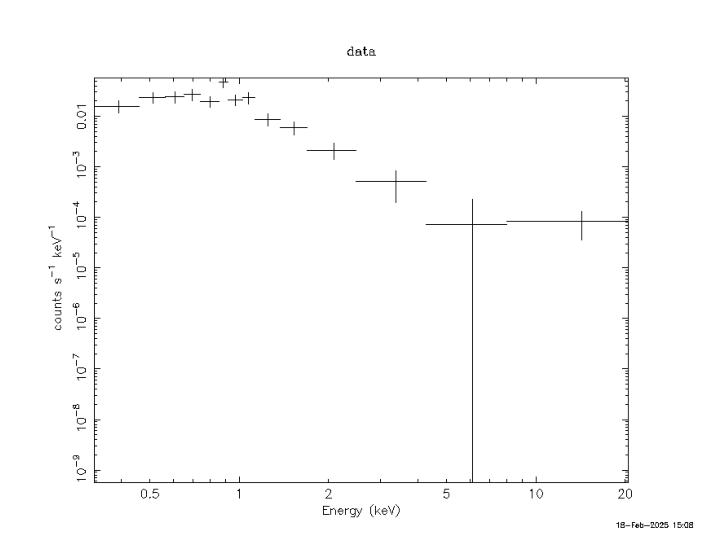

In [4]:
source = "ObsID0945060134_SRCNUM1_EPN"
img = plt.imread(source+"_Spectrum.png")
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              3.261519e+12     using 14 bins.

Te

(-0.5, 860.5, 666.5, -0.5)

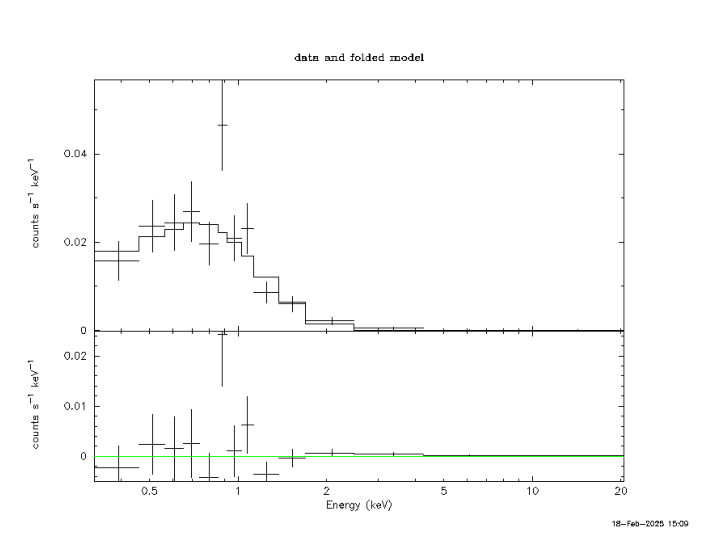

In [5]:
img = plt.imread(source+"_Spectrum_bbody.png")
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.304484e+10     using 14 bins.

Test statistic : Chi-Squared              7.304484e+10     using 14 bins.
 Null hypothesis probability of 0.000000e+00 with 11 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
142.619      3.30614      -2      0.296559       29.3144   6.69856e-06
139.752      519291       -3     0.0747837       196.923   7.51200e-06
101.668      565772       -1    0.00770856       22.3081   8.61720e-06


(-0.5, 859.5, 661.5, -0.5)

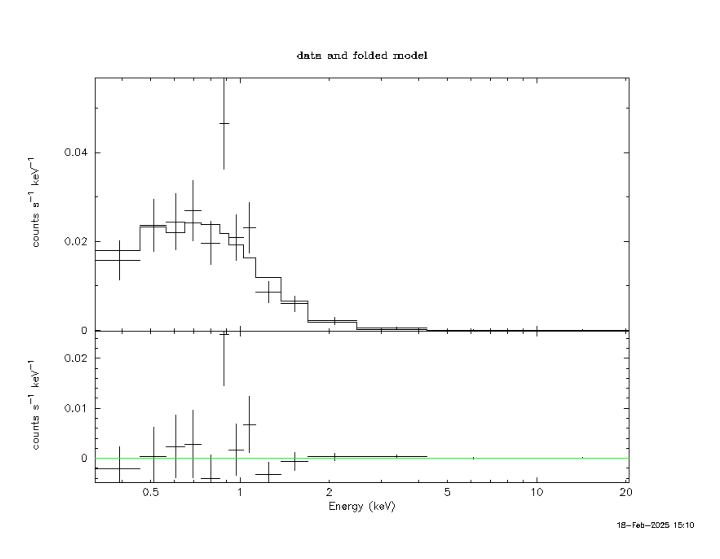

In [6]:
img = plt.imread(source+"_Spectrum_bremss.png")
plt.imshow(img)
plt.axis('off')

### Apec model

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              7.671661e+09     using 14 bins.

Test statistic : Chi-Squared              7.671661e+09     using 14 bins.
 Null hypothesis probability of 0.000000e+00 with 11 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
55.9185      14.0034      -3      0.627944      0.733499   

(-0.5, 862.5, 667.5, -0.5)

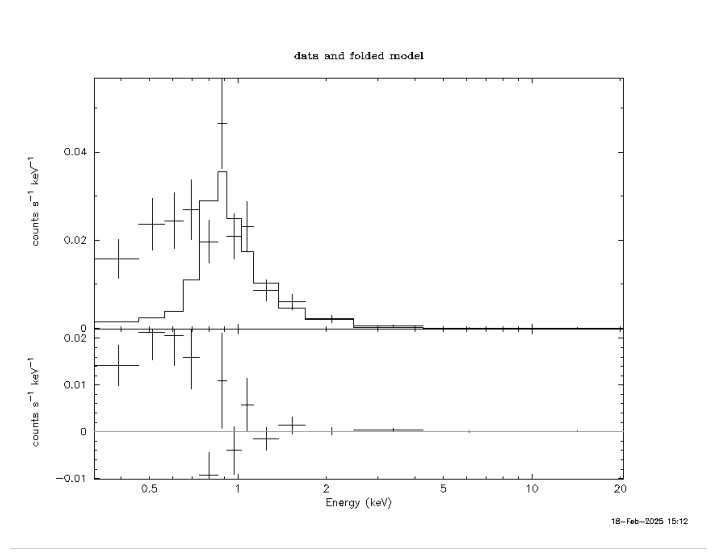

In [7]:
img = plt.imread(source+"_Spectrum_apec.png")
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [8]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.627937e+11     using 14 bins.

Test statistic : Chi-Squared              5.627937e+11     using 14 bins.
 Null hypothesis probability of 0.000000e+00 with 11 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
137.833      2.77138       0      0.262723       1.18579   4.34767e-06
133.406      816002       -1    0.00927257       1.39907   2.39439e-06
88.6952      2.23808e+06  -2      0.364164       6.67709   2.11908e-0

(-0.5, 864.5, 666.5, -0.5)

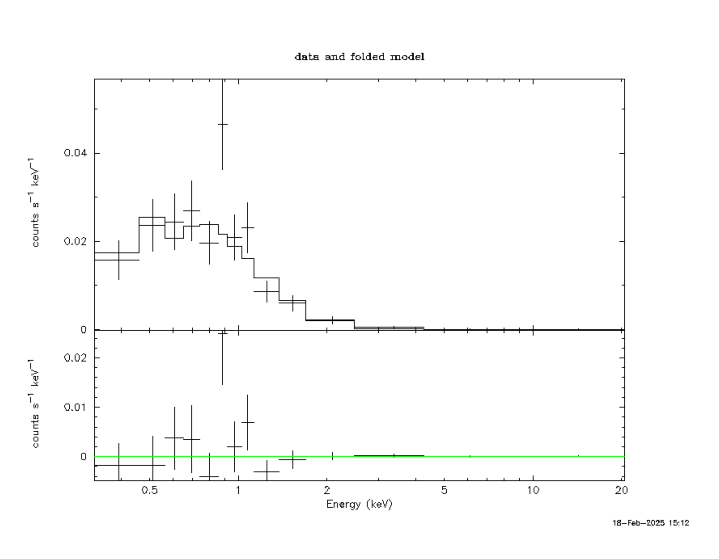

In [8]:
img = plt.imread(source+"_Spectrum_powerlaw.png")
plt.imshow(img)
plt.axis('off')

## Flux

In [9]:
AllModels.calcFlux(".2 12.0")

 Model Flux 3.8375e-05 photons (5.8795e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [10]:
Flux = 5.8795e-14 # ergs/cm^2/s

### Luminosité
Dans ESASky le pointeur est sur une source verte, éloignée de la source EPIC stack la plus proche. Cependant, lorsqu'on regarde l'image sur XMM Archive, il semblerait que ce soit bien cette source verte.

``2MASS``
- Name : 03342264-2854082
- RA : 03h 34m 22.642s
- DEC : -28° 54' 08.24"

``GAIA``
- Designation : DR3 5057101614813827200
- RA : 03h 34m 22.626s
- DEC : -28° 54' 08.62"
- Parallax : 2.941 mas

In [15]:
"""GAIA"""

P_mas = 2.941 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GAIA)
Distance : 1.0492009520571234e+21 cm
Luminosité : 8.13331533811522e+29 erg/s
